### NRP   : 2172019
### Nama : Thoriq Hidayansyah

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)


from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score,jaccard_score,log_loss
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

### Import Dataset

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

### Visualisasi Data

<AxesSubplot: >

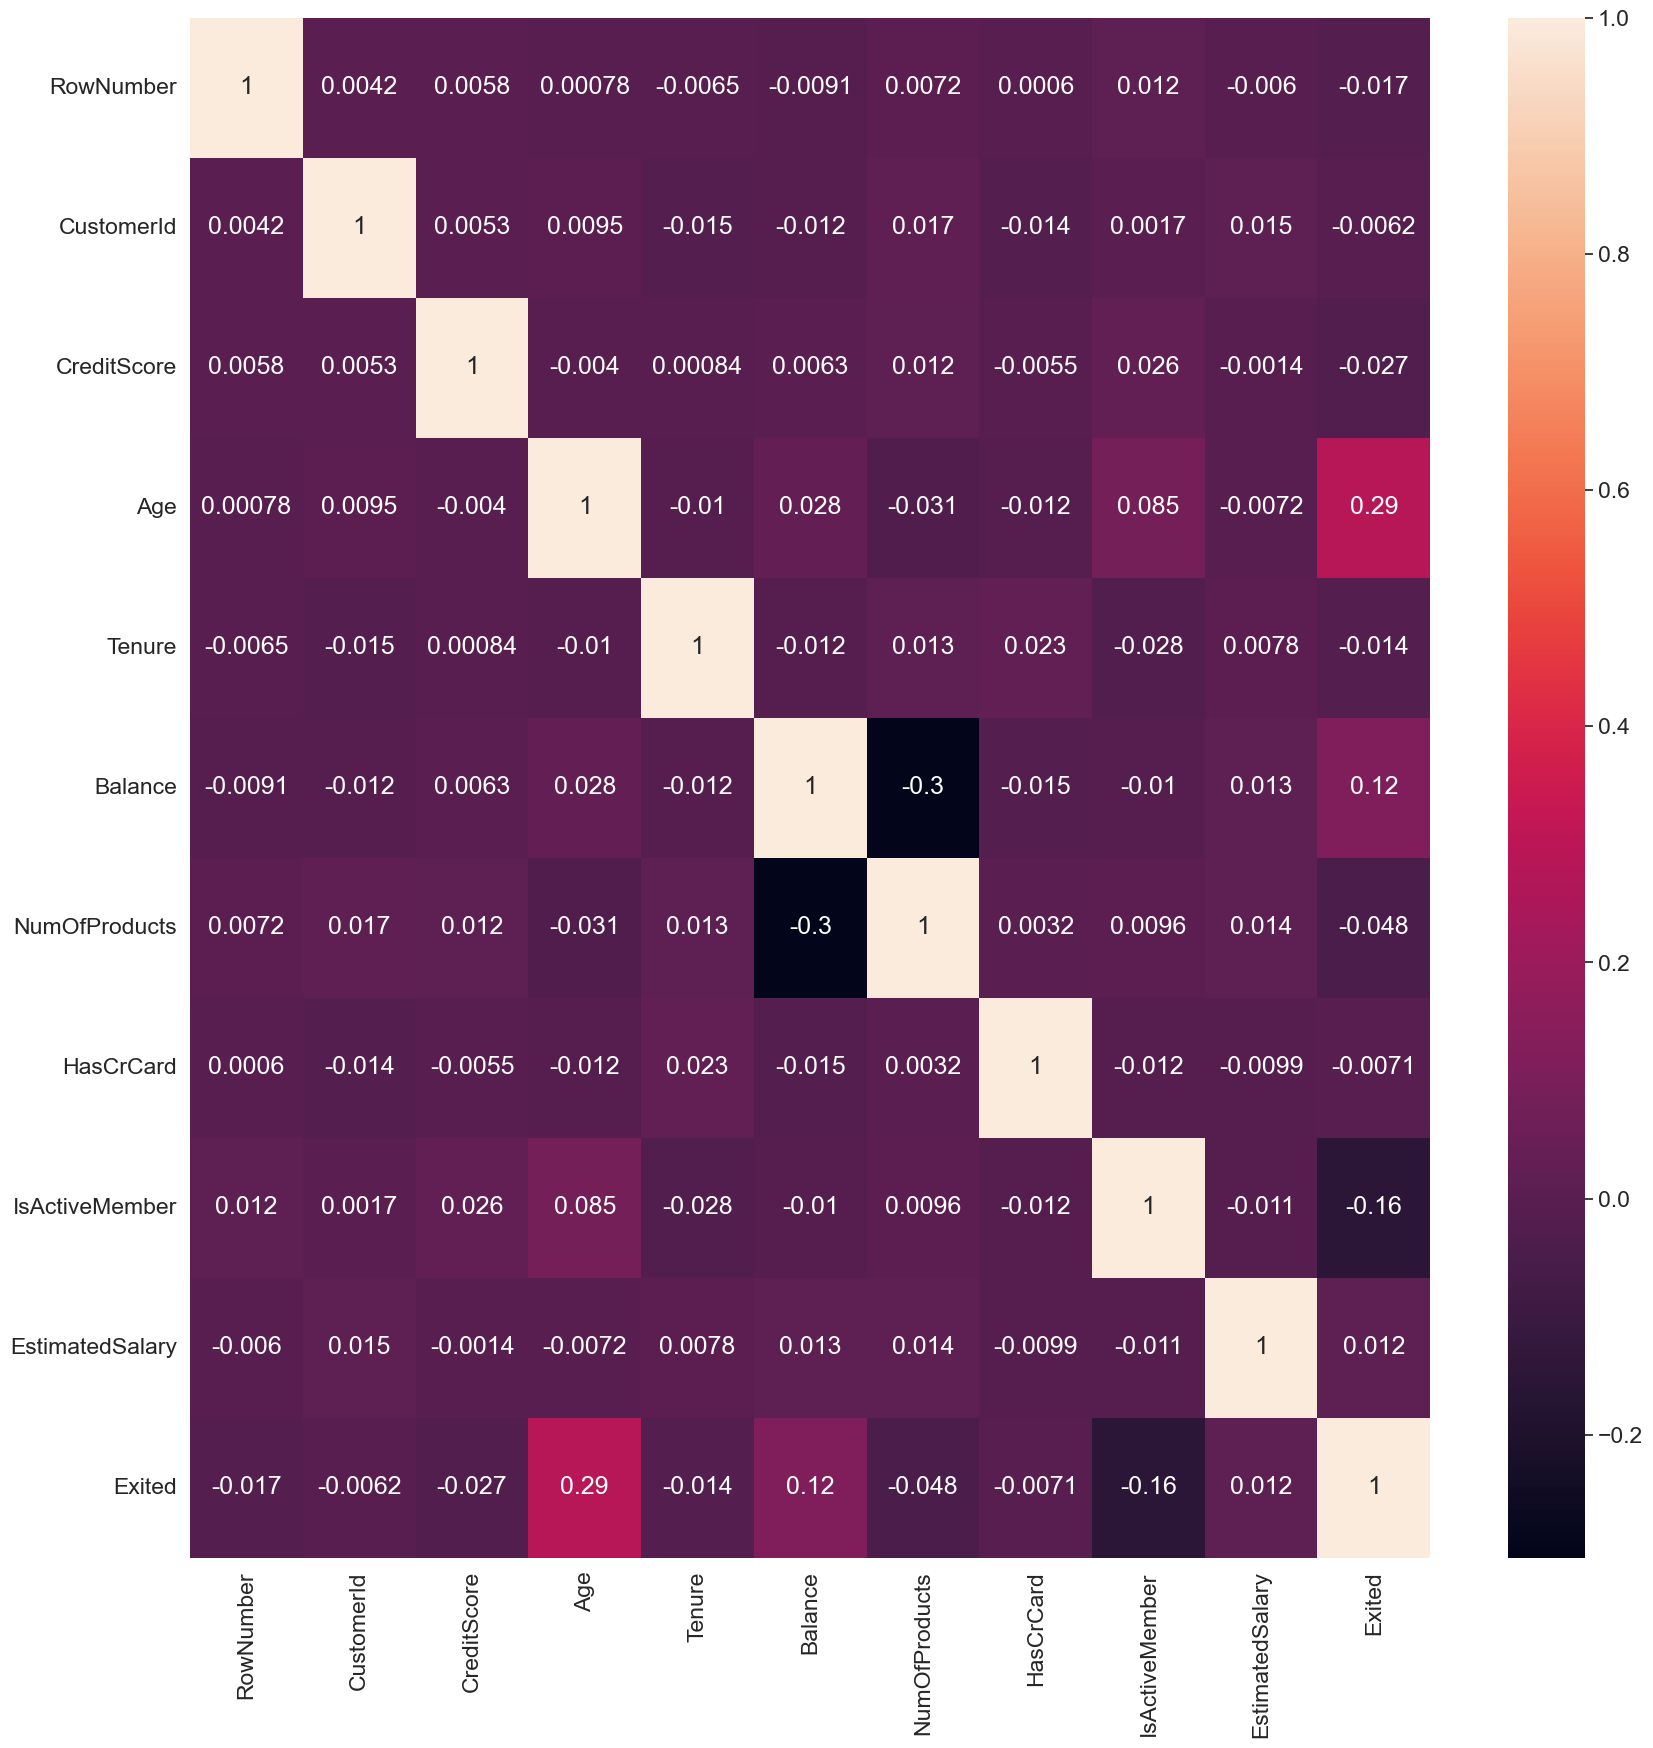

In [5]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(),annot=True)

##### visualisasi diatas mencari korelasi - korelasi antara setiap features

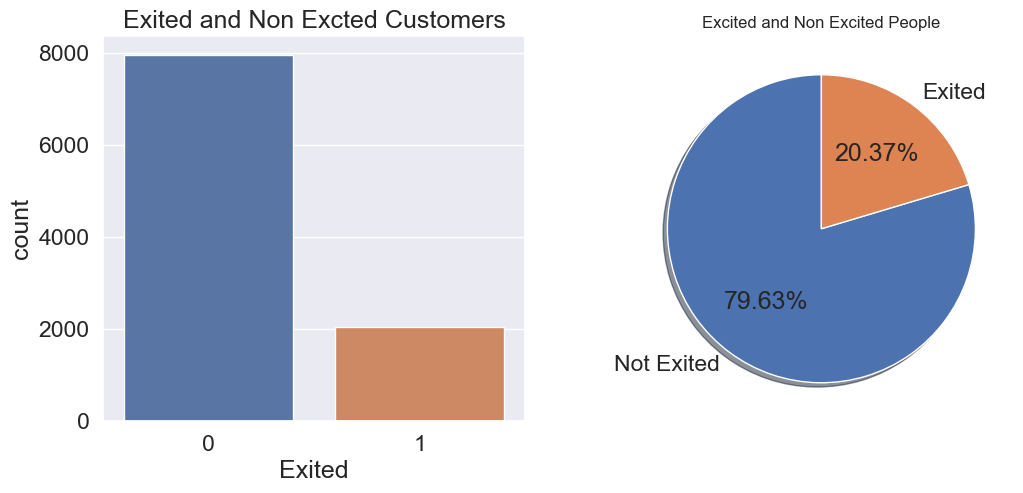

In [27]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='Exited',data=df)
plt.title("Exited and Non Excted Customers")
plt.subplot(1,2,2)
sizes = df['Exited'].value_counts(sort = True)
plt.pie(sizes,labels=["Not Exited","Exited"],autopct='%1.2f%%', shadow=True, startangle=90)
plt.title('Excited and Non Excited People',size = 12)
plt.show()

##### Visualisasi diatas memperlihatkan data inbalance

RowNumber


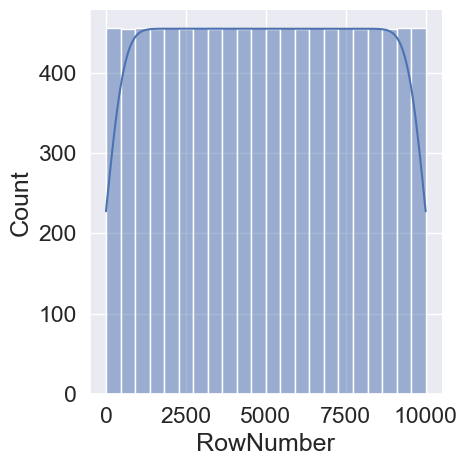

CustomerId


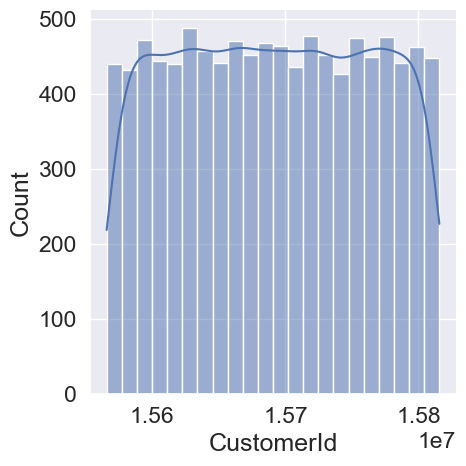

CreditScore


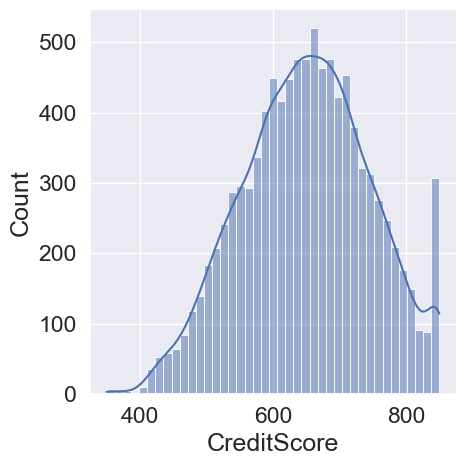

Geography


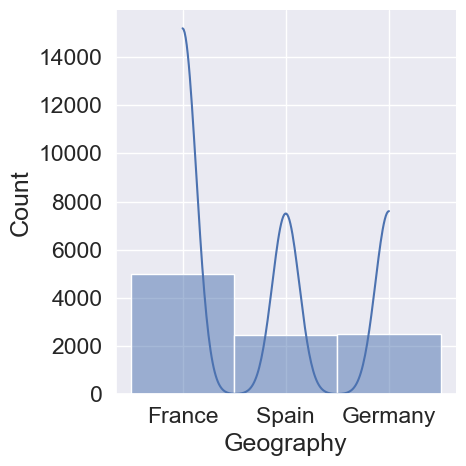

Gender


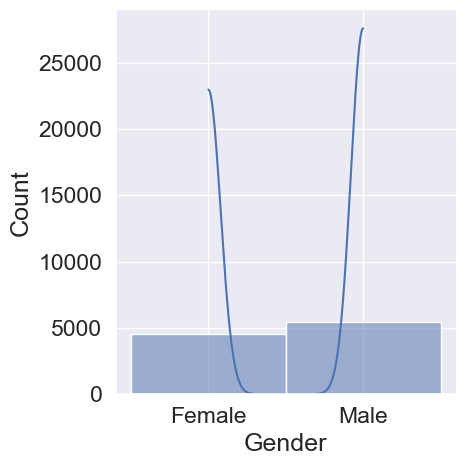

Age


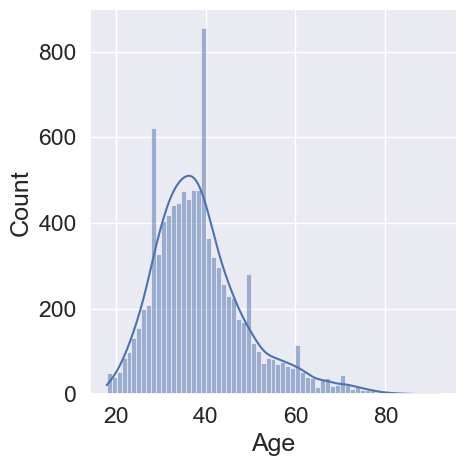

Tenure


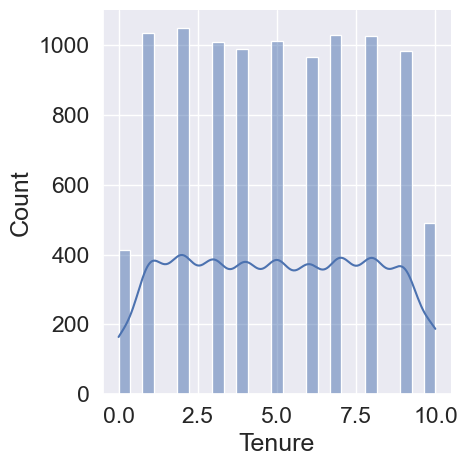

Balance


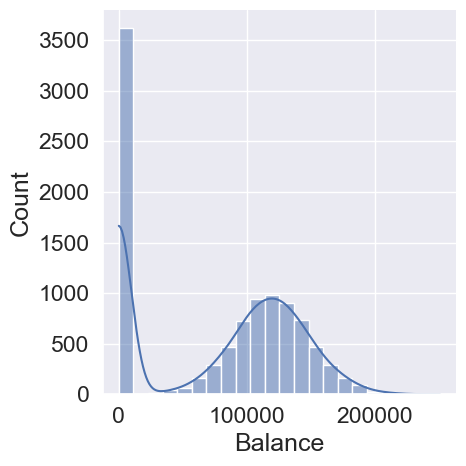

NumOfProducts


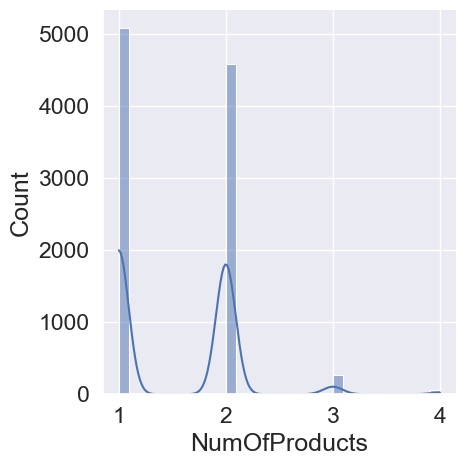

HasCrCard


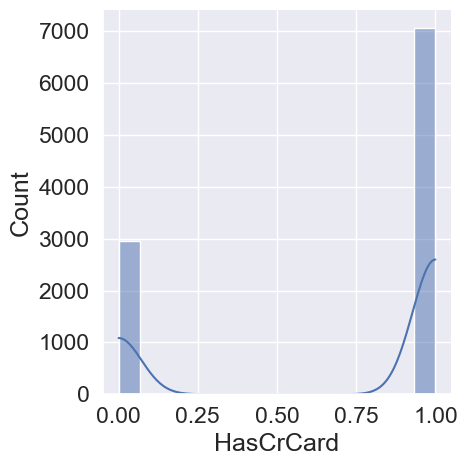

IsActiveMember


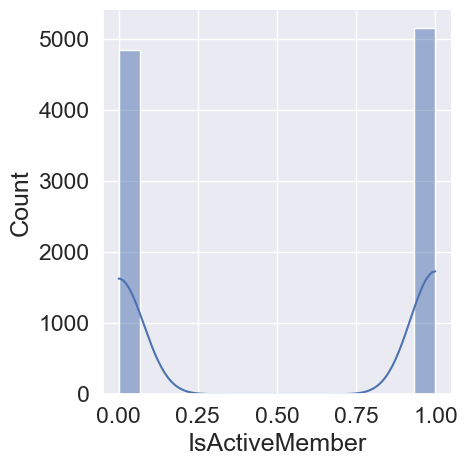

EstimatedSalary


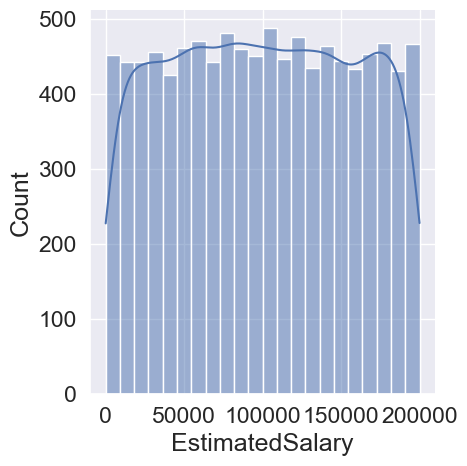

Exited


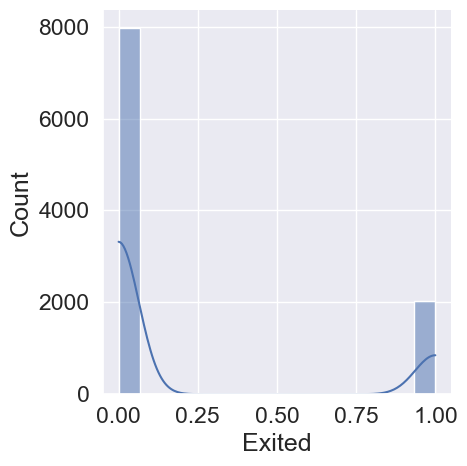

In [7]:
for i in df.columns:
    if(i != 'Surname'):
        print(i)
        sns.displot(df[i],kde=True)
        plt.show()

##### Visualisasi diatas memperlihatkan perhitungan antara setiap features

### Data Preparation

In [8]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [9]:
df.drop(columns=["Surname","RowNumber","CustomerId"],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
cat_cols = ["Geography","Gender"]

for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
Unique Values in Gender column is: ['Female' 'Male']


In [12]:
encoder = LabelEncoder()

df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Split Dataset

In [14]:
X = df.drop(columns=["Exited"])
y = df["Exited"]

In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [16]:
dtree = DecisionTreeClassifier(class_weight="balanced")

In [17]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

### Print Accuracy

In [18]:
y_train_pred = dtree.predict(x_train)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))

Accuracy Score of Model on Training Data is => 100.0 %
Accuracy Score of Model on Testing Data  is => 78.97 %
F1 Score of the Model is => 0.7896666666666666


### Plot the Tree

[Text(0.6552046107692964, 0.9807692307692307, 'X[3] <= 41.5\ngini = 0.5\nsamples = 7000\nvalue = [3500.0, 3500.0]'),
 Text(0.4687420072183699, 0.9423076923076923, 'X[6] <= 2.5\ngini = 0.445\nsamples = 4771\nvalue = [2651.952, 1334.746]'),
 Text(0.34830588552915764, 0.9038461538461539, 'X[6] <= 1.5\ngini = 0.425\nsamples = 4675\nvalue = [2635.655, 1161.723]'),
 Text(0.20764180970785495, 0.8653846153846154, 'X[3] <= 34.5\ngini = 0.49\nsamples = 2292\nvalue = [1205.946, 909.605]'),
 Text(0.09132019438444924, 0.8269230769230769, 'X[1] <= 0.5\ngini = 0.451\nsamples = 1231\nvalue = [681.322, 355.932]'),
 Text(0.044020688871206096, 0.7884615384615384, 'X[5] <= 57593.773\ngini = 0.387\nsamples = 642\nvalue = [369.18, 131.003]'),
 Text(0.021996135046038423, 0.75, 'X[9] <= 176057.148\ngini = 0.496\nsamples = 132\nvalue = [68.32, 56.85]'),
 Text(0.015346140729794249, 0.7115384615384616, 'X[3] <= 32.5\ngini = 0.473\nsamples = 117\nvalue = [63.306, 39.548]'),
 Text(0.009776060020461521, 0.673076923

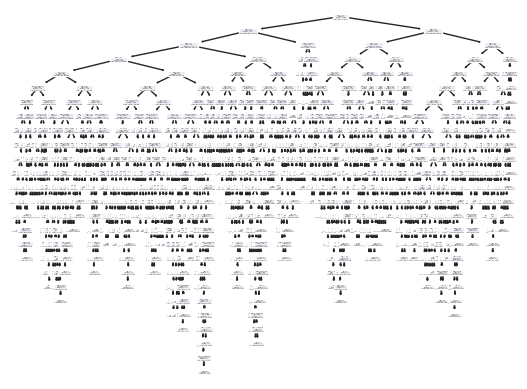

In [19]:
from sklearn import tree

tree.plot_tree(dtree)

### Searching Hyperparameter

In [20]:
dtreetunning = DecisionTreeClassifier(class_weight="balanced")

In [21]:
param_grid = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[2,3,4],
              "min_samples_leaf":[1,2,3,4],
              "random_state":[0,42]}

In [22]:
grid_search = GridSearchCV(dtreetunning, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]})

### Print Best Hyperparameter

In [23]:
print("Best Parameters are:\n")
print(grid_search.best_params_)

Best Parameters are:

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [24]:
dtree_with_hyper = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=2, random_state=0)

dtree_with_hyper.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=0)

### Accuracy After Tunning Hyperparameter

In [25]:
y_train_pred_hyper = dtree_with_hyper.predict(x_train)
y_test_pred_hyper = dtree_with_hyper.predict(x_test)

print("Accuracy Score of Model tunning hyperparameter on Training Data is =>",round(accuracy_score(y_train,y_train_pred_hyper)*100,2),"%")
print("Accuracy Score of Model tunning hyperparameter on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred_hyper)*100,2),"%")
print("F1 Score of the Model tunning hyperparameter is =>",f1_score(y_test,y_test_pred,average="micro"))

Accuracy Score of Model tunning hyperparameter on Training Data is => 85.69 %
Accuracy Score of Model tunning hyperparameter on Testing Data  is => 85.83 %
F1 Score of the Model tunning hyperparameter is => 0.7896666666666666


### Plot the Tree

[Text(0.48660714285714285, 0.9166666666666666, 'X[3] <= 42.5\ngini = 0.323\nsamples = 7000\nvalue = [5584, 1416]'),
 Text(0.25892857142857145, 0.75, 'X[6] <= 2.5\ngini = 0.209\nsamples = 4991\nvalue = [4398, 593]'),
 Text(0.14285714285714285, 0.5833333333333334, 'X[6] <= 1.5\ngini = 0.188\nsamples = 4883\nvalue = [4371, 512]'),
 Text(0.07142857142857142, 0.4166666666666667, 'X[3] <= 38.5\ngini = 0.28\nsamples = 2394\nvalue = [1991, 403]'),
 Text(0.03571428571428571, 0.25, 'X[1] <= 0.5\ngini = 0.237\nsamples = 1847\nvalue = [1593, 254]'),
 Text(0.017857142857142856, 0.08333333333333333, 'gini = 0.185\nsamples = 959\nvalue = [860, 99]'),
 Text(0.05357142857142857, 0.08333333333333333, 'gini = 0.288\nsamples = 888\nvalue = [733, 155]'),
 Text(0.10714285714285714, 0.25, 'X[8] <= 0.5\ngini = 0.396\nsamples = 547\nvalue = [398, 149]'),
 Text(0.08928571428571429, 0.08333333333333333, 'gini = 0.453\nsamples = 285\nvalue = [186, 99]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.309\nsamples = 

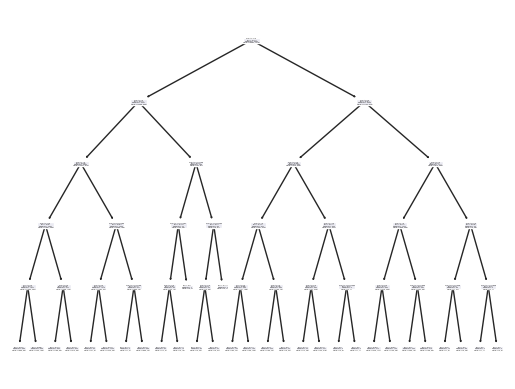

In [26]:
tree.plot_tree(dtree_with_hyper)